## CITES Manidae Subset Analysis

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
'''
@param {df} record_plot
sum preceding value along columns of a df
modification inplace
'''
def aggYear(record_plot):
    for column in record_plot:
        prev = 0
        new_col = list()
        for cell in record_plot[column]:
            if (cell > 0):
                if (prev > 0):
                    cell = cell + prev
            else:
                cell = prev
            prev = cell
            new_col.append(cell)
        record_plot.drop(column, axis=1, inplace=True)
        record_plot[column] = new_col
'''
@param {df} df subset
change unit to kg and update quantity
modification inplace
'''
def unify_weight2kg(_df):
    new_unit = list()
    new_quantity = list()
    for index, row in _df.iterrows():
        new_unit.append('kg')
        if (row['unit'] == 'g'):
            new_quantity.append(row['quantity'] / 1000)
        else:
            new_quantity.append(row['quantity'])
    _df.drop('unit', axis=1, inplace=True)
    _df['unit'] = new_unit
    _df.drop('quantity', axis=1, inplace=True)
    _df['quantity'] = new_quantity
    return _df

def agg_year_record(series):
    prev = 0
    for year, num in series.iteritems():
        series[year] = num + prev
        prev = series[year]
    return series

In [2]:
df = pd.read_csv('./manidae.csv')
df = df.drop(['id', 'import_permit_randomid', 'export_permit_randomid', 'origin_permit_randomid'], axis=1)
df.head()

,year,appendix,taxon,class,ord,family,genus,term,quantity,unit,importer,exporter,origin,purpose,source,reporter_type
0,1979,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,skins,356.0,NaN,US,ES,XX,T,NaN,I
1,1981,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,skin pieces,1.0,cartons,HK,XX,NaN,NaN,I,I
2,1981,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,shoes,1.0,NaN,US,XX,TH,P,NaN,I
3,1981,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,shoes,2.0,NaN,US,XX,TH,P,NaN,I
4,1981,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,leather items,2.0,NaN,US,XX,TH,P,NaN,I


## Basic Stats

In [5]:
print('total: {}'.format(len(df)))

total: 3631


#### Taxons

In [6]:
df.groupby(['taxon']).size().reset_index().rename(columns={0:'record_count'}).sort_values(by="record_count", ascending=False)

,taxon,record_count
4,Manis javanica,2134
6,Manis spp.,552
5,Manis pentadactyla,541
9,Manis tricuspis,163
3,Manis gigantea,105
8,Manis tetradactyla,52
1,Manis crassicaudata,41
7,Manis temminckii,35
2,Manis culionensis,7
0,Manidae spp.,1


#### EXCEPTION CASE
 - all cases are under the same class, order, and family with manis genus, one exception will null datum

In [7]:
df[df['genus'].isnull()]

,year,appendix,taxon,class,ord,family,genus,term,quantity,unit,importer,exporter,origin,purpose,source,reporter_type
3626,2017,I,Manidae spp.,Mammalia,Pholidota,Manidae,NaN,scales,14.8,kg,ZA,HK,NaN,L,I,I


### Reported records of import/export by year

Total Import Record: 2379
Total Export Record: 1252


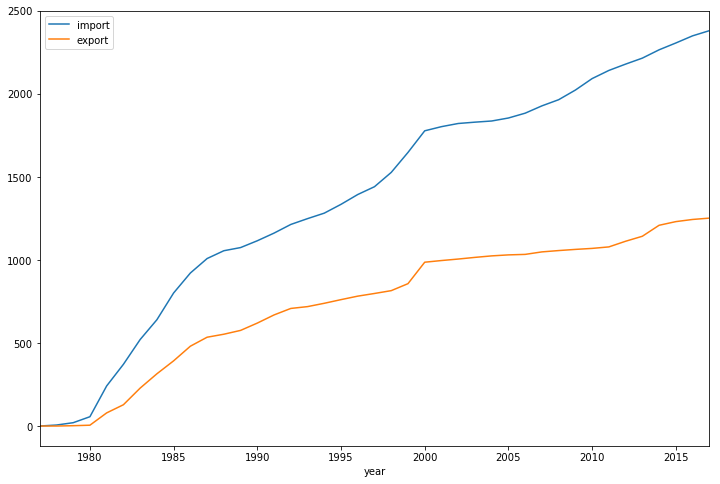

In [8]:
df_import = df[df['reporter_type'] == 'I']
print("Total Import Record: {}".format(len(df_import)))
series_import_record_by_year = df_import.groupby('year').size()
# agg_year_record


df_export = df[df['reporter_type'] == 'E']
print("Total Export Record: {}".format(len(df_export)))
series_export_record_by_year = df_export.groupby('year').size()

record_import_export = pd.concat([
    agg_year_record(series_import_record_by_year),
    agg_year_record(series_export_record_by_year)
], axis=1)

# fill NA years
record_import_export = record_import_export.fillna(method='ffill')
record_import_export.columns = ['import', 'export']
record_import_export.plot()

### Reported records of import of different pangolins by year

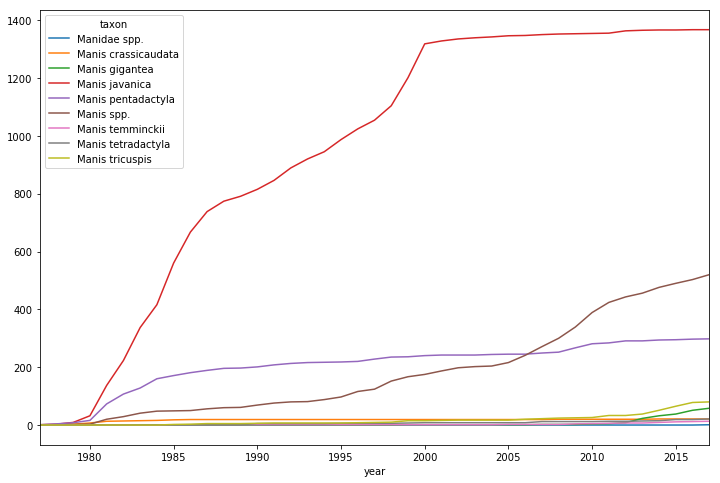

In [9]:
df_import = df[df['reporter_type'] == 'I']
df_import_grouped_by_year_taxon = df_import.groupby(['year', 'taxon']).size().to_frame()
df_import_grouped_by_year_taxon.columns = ['size']
import_record_plot = df_import_grouped_by_year_taxon.unstack('taxon').loc[:, 'size']
#aggregate along the years
aggYear(import_record_plot)
import_record_plot.plot()

### Reported records of export of different pangolins by year

1252


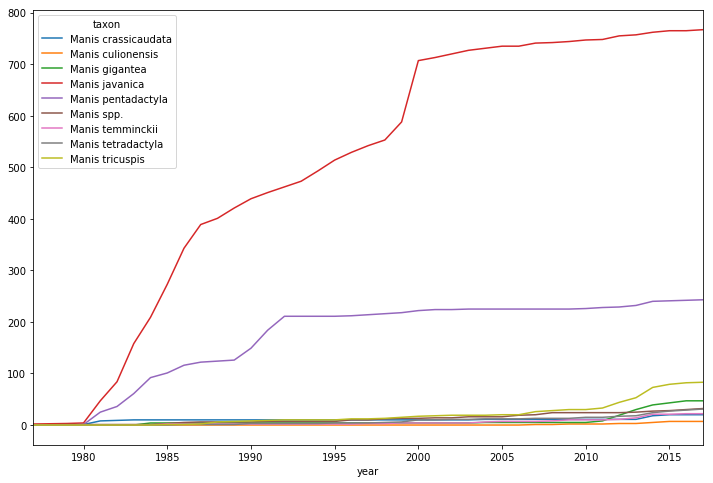

In [10]:
df_export = df[df['reporter_type'] == 'E']
print(len(df_export))
df_export_grouped_by_year_taxon = df_export.groupby(['year', 'taxon']).size().to_frame()
df_export_grouped_by_year_taxon.columns = ['size']
export_record_plot = df_export_grouped_by_year_taxon.unstack('taxon').loc[:, 'size']
#aggregate along the years

aggYear(export_record_plot)
export_record_plot.plot()

### Reported records of import of different countries by year

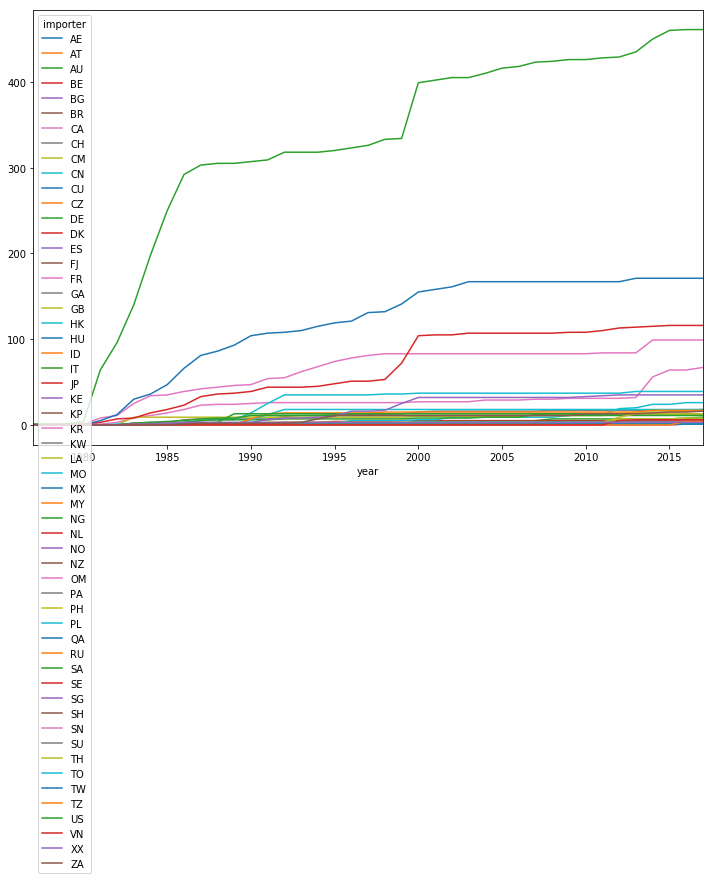

In [11]:
df_import = df[df['reporter_type'] == 'I']
df_import_grouped_by_year_country = df_export.groupby(['year', 'importer']).size().to_frame()
df_import_grouped_by_year_country.columns = ['size']
import_record_plot = df_import_grouped_by_year_country.unstack('importer').loc[:, 'size']
#aggregate along the years

aggYear(import_record_plot)
import_record_plot.plot()

In [12]:
import_record_plot.loc[2017].sort_values(ascending=False).head(10)

importer
US    461.0
MX    171.0
JP    116.0
CA     99.0
FR     67.0
HK     39.0
SG     35.0
CN     26.0
MO     18.0
CH     18.0
Name: 2017, dtype: float64

### Reported records of import of different countries by year

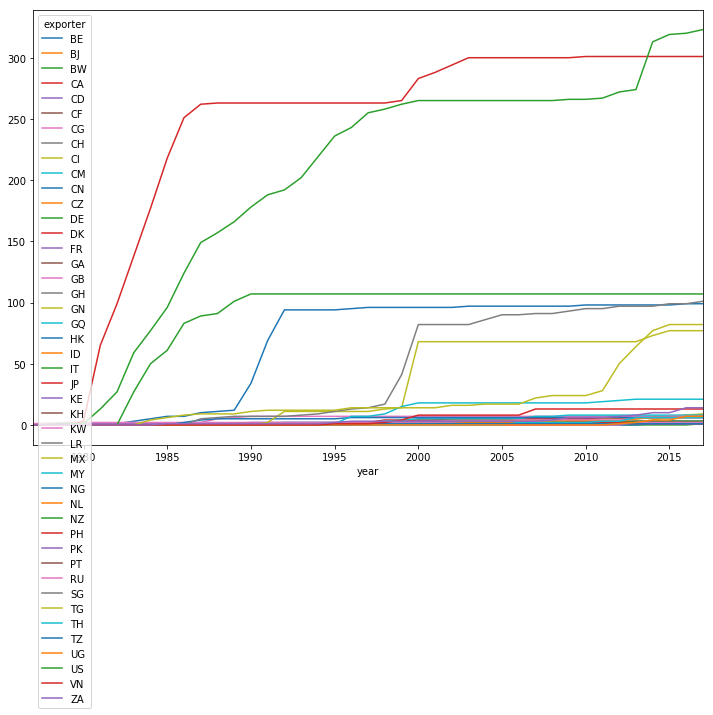

In [13]:
df_export = df[df['reporter_type'] == 'E']
df_export_grouped_by_year_country = df_export.groupby(['year', 'exporter']).size().to_frame()
df_export_grouped_by_year_country.columns = ['size']
export_record_plot = df_export_grouped_by_year_country.unstack('exporter').loc[:, 'size']
#aggregate along the years

aggYear(export_record_plot)
export_record_plot.plot()

In [14]:
export_record_plot.loc[2017].sort_values(ascending=False).head(10)

exporter
US    323.0
JP    301.0
IT    107.0
SG    101.0
CN     99.0
TG     82.0
MX     77.0
MY     21.0
ZA     14.0
VN     13.0
Name: 2017, dtype: float64

### Import by term along years

total entries containing term (no NaN):  3631
term
skins                       953.0
shoes                       546.0
derivatives                 183.0
scales                      118.0
leather items               104.0
leather products (small)    103.0
specimens                    69.0
bodies                       67.0
live                         66.0
medicine                     61.0
Name: 2017, dtype: float64


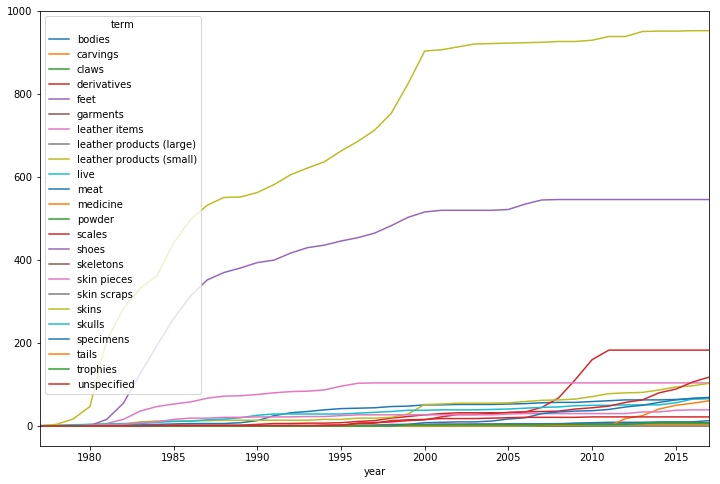

In [15]:
print('total entries containing term (no NaN): ',len(df[df['term'].notnull()]))
df_import_term_year = df[df['reporter_type']=='I'].groupby(['year','term']).size().to_frame()
df_import_term_year.columns = ['size']
import_term_year_plot = df_import_term_year.unstack('term').loc[:, 'size']
#inplace aggregation
aggYear(import_term_year_plot)
print(import_term_year_plot.loc[2017].sort_values(ascending=False).head(10))

import_term_year_plot.plot()

### Export by term along years

term
skins                       499.0
shoes                       202.0
specimens                   103.0
live                         95.0
leather products (small)     94.0
derivatives                  80.0
scales                       50.0
skin pieces                  48.0
bodies                       31.0
leather items                30.0
Name: 2017, dtype: float64


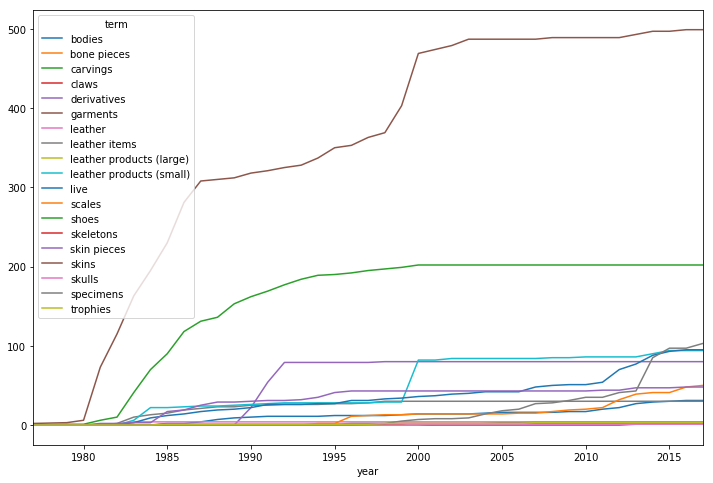

In [16]:
df_export_term_year = df[df['reporter_type']=='E'].groupby(['year','term']).size().to_frame()
df_export_term_year.columns = ['size']
export_term_year_plot = df_export_term_year.unstack('term').loc[:, 'size']
#inplace aggregation
aggYear(export_term_year_plot)
print(export_term_year_plot.loc[2017].sort_values(ascending=False).head(10))

export_term_year_plot.plot()

### Purpose Study

#### Purpose Code Map

In [17]:
purpose_code_pairs = {'B': 'Breeding in captivity or artificial propagation',
'E': 'Educational',
'G': 'Botanical garden',
'H': 'Hunting trophy',
'L': 'Law enforcement / judicial / forensic',
'M': 'Medical (including biomedical research)',
'N': 'Reintroduction or introduction into the wild',
'P': 'Personal',
'Q': 'Circus or travelling exhibition',
'S': 'Scientific',
'T': 'Commercial',
'Z': 'Zo'}

#### Unreported purpose

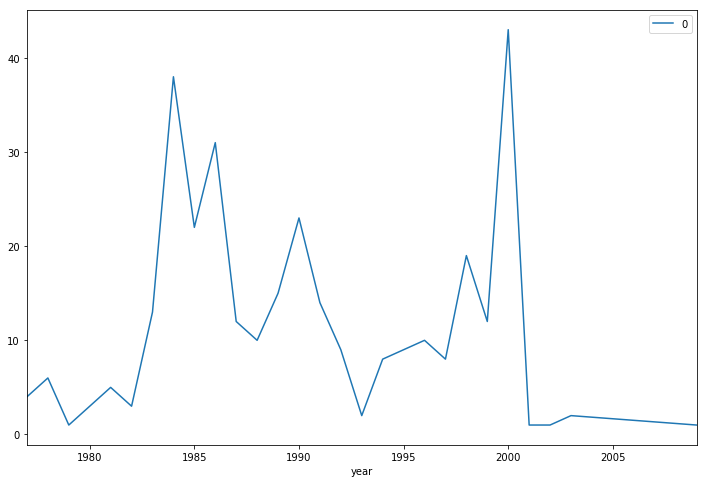

In [18]:
df_nopurpose = df[df['purpose'].isnull()]
df_nopurpose.groupby('year').size().to_frame().plot()

#### Purpose ranking

In [19]:
df_purpose = df[df['purpose'].notnull()]
print('entries with purpose: {}'.format(len(df_purpose)))
purpose_count_plot = df_purpose.groupby('purpose').size().to_frame().sort_values(by=0, ascending=False)
purpose_count_plot = purpose_count_plot.reset_index()
purpose_count_plot.columns = ['purpose', 'count']
purpose_count_plot

entries with purpose: 3306


,purpose,count
0,T,2628
1,P,379
2,S,179
3,E,38
4,Z,28
5,L,18
6,Q,13
7,M,11
8,H,7
9,B,5


### Term and Unit mapping

In [20]:
print('Terms: ')
print(df['term'].unique())

Terms: 
['skins' 'skin pieces' 'shoes' 'leather items' 'bodies'
 'leather products (small)' 'unspecified' 'derivatives' 'live' 'carvings'
 'specimens' 'claws' 'feet' 'scales' 'meat' 'tails'
 'leather products (large)' 'skulls' 'skeletons' 'powder' 'leather'
 'skin scraps' 'trophies' 'garments' 'bone pieces' 'medicine']


In [21]:
print('Units: ')
print(df['unit'].unique())

Units: 
[nan 'cartons' 'kg' 'g' 'flasks' 'ml' 'm' 'cm' 'm2' 'pieces' 'boxes'
 'pairs']


In [22]:
print('Unit & Term Combination: ')
df.groupby(['unit', 'term']).size().to_frame()

Unit & Term Combination: 


0
unit    term                         
boxes   derivatives                 1
cartons derivatives                77
        skin pieces                 1
cm      skins                      29
flasks  specimens                  11
g       derivatives                 8
        meat                        2
        medicine                    4
        powder                      1
        scales                     28
        specimens                   3
        unspecified                11
kg      bodies                      1
        derivatives                 7
        meat                        6
        scales                    104
        shoes                       1
        skin pieces                15
        skin scraps                 1
        skins                      39
        specimens                   2
        unspecified                 3
m       skin pieces                 2
        skins                       8
m2      skins                       9
ml      specimens                  13
pairs   leather items               2
        leather products (small)   35
        skins                       1
pieces  leather                     4

In [23]:
print('Unit & Term Combination: ')
df.groupby(['term', 'unit']).size().to_frame()

Unit & Term Combination: 


0
term                     unit        
bodies                   kg         1
derivatives              boxes      1
                         cartons   77
                         g          8
                         kg         7
leather                  pieces     4
leather items            pairs      2
leather products (small) pairs     35
meat                     g          2
                         kg         6
medicine                 g          4
powder                   g          1
scales                   g         28
                         kg       104
shoes                    kg         1
skin pieces              cartons    1
                         kg        15
                         m          2
skin scraps              kg         1
skins                    cm        29
                         kg        39
                         m          8
                         m2         9
                         pairs      1
specimens                flasks    11
                         g          3
                         kg         2
                         ml        13
unspecified              g         11
                         kg         3

### Quantity in unit of weight ~ Scale
 * The Scales term is records in either ```g``` or ```kg```

#### Import/Export quantiy (g/kg) term(scales)

Overall trend of scales import/export: 


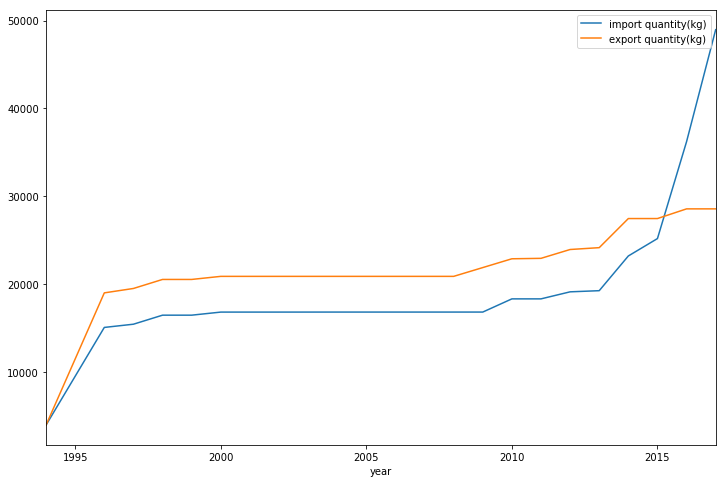

In [24]:
df_scales_weight = df[df['unit'].isin(['g', 'kg'])]
df_scales_weight = df_scales_weight[df_scales_weight['term'] == 'scales']
df_scales_weight_import  = df_scales_weight[df_scales_weight['reporter_type'] == 'I']
df_scales_weight_export  = df_scales_weight[df_scales_weight['reporter_type'] == 'E']
print('Overall trend of scales import/export: ')
df_scales_weight_import_kg = unify_weight2kg(df_scales_weight_import)
df_scales_weight_import_kg = df_scales_weight_import_kg.groupby('year').sum() # !!! sorted by years
df_scales_weight_export_kg = unify_weight2kg(df_scales_weight_export)
df_scales_weight_export_kg = df_scales_weight_export_kg.groupby('year').sum() # !!! sorted by years
#agg along years
df_IE_scales = pd.concat([
    agg_year_record(df_scales_weight_import_kg['quantity']),
    agg_year_record(df_scales_weight_export_kg['quantity'])
], axis=1)
df_IE_scales.columns = ['import quantity(kg)', 'export quantity(kg)']
df_IE_scales.fillna(method='ffill').plot()

#### Scale import quantity by country

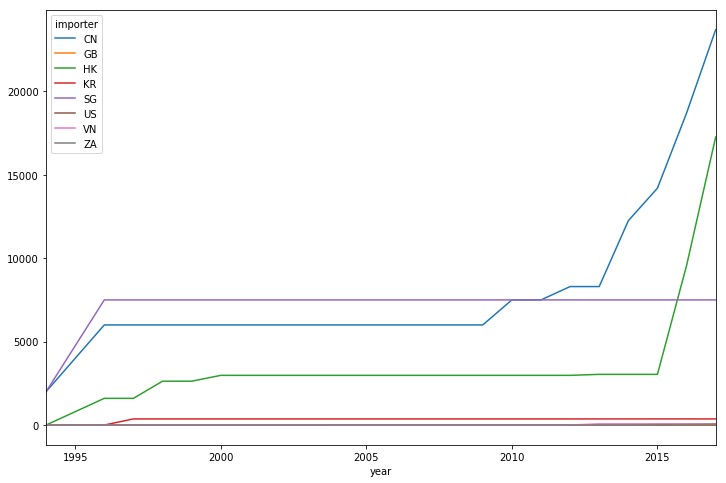

In [25]:
df_scales_weight_import_kg = unify_weight2kg(df_scales_weight_import)
scale_import_quantity_country = df_scales_weight_import_kg.groupby(['year', 'importer']).sum().unstack('importer').loc[:, 'quantity']
aggYear(scale_import_quantity_country)
scale_import_quantity_country.plot()

#### Scale export quantity by country

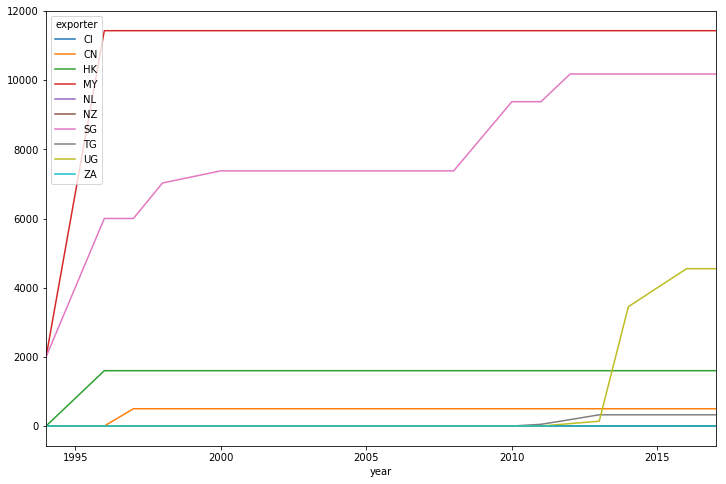

In [26]:
df_scales_weight_export_kg = unify_weight2kg(df_scales_weight_export)
scale_export_quantity_country = df_scales_weight_export_kg.groupby(['year', 'exporter']).sum().unstack('exporter').loc[:, 'quantity']
aggYear(scale_export_quantity_country)
scale_export_quantity_country.plot()

#### Scale import quantity by purpose

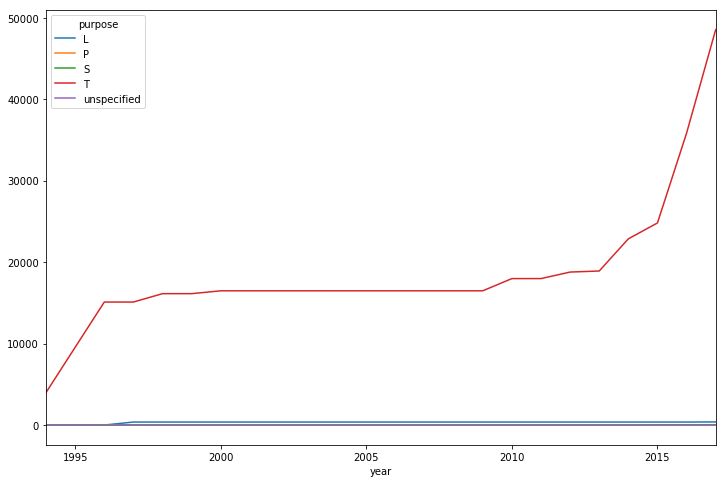

In [27]:
df_scales_weight_import_kg = unify_weight2kg(df_scales_weight_import)
#fillna with unscpecified
df_scales_weight_import_kg['purpose'].fillna('unspecified', inplace=True)

scale_import_quantity_purpose = df_scales_weight_import_kg.groupby(['year', 'purpose']).sum().unstack('purpose').loc[:, 'quantity']
aggYear(scale_import_quantity_purpose)
scale_import_quantity_purpose.plot()

#### Scale export quantity by purpose

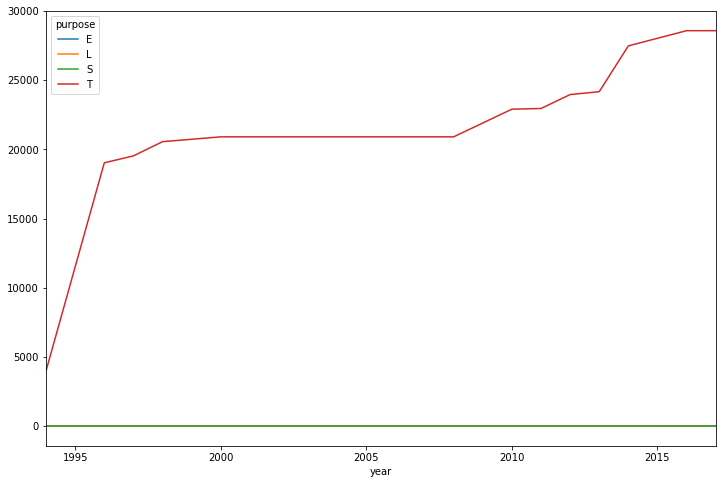

In [28]:
df_scales_weight_export_kg = unify_weight2kg(df_scales_weight_export)
# na NaN but fillna anyway
df_scales_weight_export_kg['purpose'].fillna('unspecified', inplace=True)
scale_export_quantity_purpose = df_scales_weight_export_kg.groupby(['year', 'purpose']).sum().unstack('purpose').loc[:, 'quantity']
aggYear(scale_export_quantity_purpose)
scale_export_quantity_purpose.plot()

## Finding match and mismatch

In [29]:
df_import = df[df['reporter_type']=='I']
df_export = df[df['reporter_type']=='E']
#filter and match import and export with same year and importer/exporter pair
df_ie_match_complete = pd.merge(df_import, df_export, on=['year','appendix', 'taxon', 'class', 'ord', 'family', 'genus', 'term', 'quantity', 'unit', 'importer', 'exporter', 'origin', 'purpose', 'source'], how='inner')
print('{} complete match cases found'.format(len(df_ie_match_complete)))
df_ie_match_complete.head(10)

331 complete match cases found


,year,appendix,taxon,class,ord,family,genus,term,quantity,unit,importer,exporter,origin,purpose,source,reporter_type_x,reporter_type_y
0,2000,II,Manis tetradactyla,Mammalia,Pholidota,Manidae,Manis,specimens,40.0,NaN,US,CF,NaN,S,W,I,E
1,2008,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,skins,2.0,NaN,CH,KW,XX,E,I,I,E
2,1981,II,Manis crassicaudata,Mammalia,Pholidota,Manidae,Manis,skins,308.0,NaN,US,JP,NaN,T,NaN,I,E
3,1981,II,Manis crassicaudata,Mammalia,Pholidota,Manidae,Manis,skins,248.0,NaN,US,JP,NaN,T,NaN,I,E
4,1981,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,skins,250.0,NaN,US,JP,NaN,T,NaN,I,E
5,1981,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,skins,250.0,NaN,US,JP,NaN,T,NaN,I,E
6,1981,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,skins,250.0,NaN,US,JP,NaN,T,NaN,I,E
7,1981,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,skins,250.0,NaN,US,JP,NaN,T,NaN,I,E
8,1981,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,skins,250.0,NaN,US,JP,NaN,T,NaN,I,E
9,1981,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,skins,250.0,NaN,US,JP,NaN,T,NaN,I,E


In [30]:
df_ie_match_rough = pd.merge(df_import, df_export, on=['year','appendix', 'taxon', 'class', 'ord', 'family', 'genus', 'term', 'quantity', 'unit', 'importer', 'exporter'], how='inner')
print('{} roughly match cases found'.format(len(df_ie_match_rough)))
df_ie_match_rough.head(10)

598 roughly match cases found


,year,appendix,taxon,class,ord,family,genus,term,quantity,unit,importer,exporter,origin_x,purpose_x,source_x,reporter_type_x,origin_y,purpose_y,source_y,reporter_type_y
0,1995,II,Manis tetradactyla,Mammalia,Pholidota,Manidae,Manis,bodies,1.0,NaN,US,BE,XX,NaN,O,I,XX,P,W,E
1,1999,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,claws,1.0,NaN,BE,US,XX,T,O,I,XX,T,W,E
2,2003,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,skins,1.0,NaN,NO,CH,XX,L,I,I,XX,NaN,I,E
3,2003,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,skins,1.0,NaN,AE,CH,XX,E,I,I,XX,NaN,I,E
4,2000,II,Manis tetradactyla,Mammalia,Pholidota,Manidae,Manis,specimens,40.0,NaN,US,CF,NaN,S,W,I,NaN,S,W,E
5,2008,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,skins,2.0,NaN,KW,CH,XX,E,U,I,XX,E,I,E
6,2008,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,skins,2.0,NaN,CH,KW,XX,E,I,I,XX,E,I,E
7,1981,II,Manis crassicaudata,Mammalia,Pholidota,Manidae,Manis,skins,252.0,NaN,US,JP,IN,T,NaN,I,NaN,T,NaN,E
8,1981,II,Manis crassicaudata,Mammalia,Pholidota,Manidae,Manis,skins,76.0,NaN,US,JP,SG,T,NaN,I,NaN,T,NaN,E
9,1981,II,Manis crassicaudata,Mammalia,Pholidota,Manidae,Manis,skins,308.0,NaN,US,JP,NaN,T,NaN,I,NaN,T,NaN,E


In [31]:
#use scales
df.groupby(['year', 'term', 'importer', 'exporter', 'reporter_type']).size()

year  term                      importer  exporter  reporter_type
1977  live                      AU        CN        I                 1
      shoes                     US        ES        I                 1
      skins                     FR        GB        E                 1
                                US        FR        E                 1
1978  leather products (small)  AU        SG        I                 1
      live                      US        TH        I                 1
      skins                     US        CN        I                 1
                                          JP        I                 3
1979  live                      US        ES        I                 1
      shoes                     CA        US        E                 1
      skins                     JP        GB        E                 1
                                US        ES        I                 3
                                          ID        I                 

## US import/export terms

In [32]:
df_us_import_term = df[df['importer']=='US']
df_us_import_term['term'].value_counts()

skins                       758
shoes                       582
leather products (small)    157
derivatives                 149
leather items               101
live                         67
specimens                    64
medicine                     61
bodies                       56
skin pieces                  43
scales                       42
unspecified                  21
meat                         13
trophies                      7
feet                          6
claws                         4
leather products (large)      3
garments                      3
tails                         3
leather                       2
carvings                      2
skulls                        2
skeletons                     2
Name: term, dtype: int64

In [33]:
df_us_export_term = df[df['exporter']=='US']
df_us_export_term['term'].value_counts()

skins                       145
shoes                       109
specimens                    57
skin pieces                  32
leather items                30
leather products (small)      8
bodies                        2
claws                         2
leather products (large)      2
derivatives                   1
scales                        1
skin scraps                   1
Name: term, dtype: int64

## Nigeria

In [34]:
df[(df['importer'] == 'NG') | (df['exporter'] == 'NG')].head()

,year,appendix,taxon,class,ord,family,genus,term,quantity,unit,importer,exporter,origin,purpose,source,reporter_type
97,1994,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,leather items,1.0,NaN,US,NG,NaN,NaN,I,I
336,2008,II,Manis spp.,Mammalia,Pholidota,Manidae,Manis,bodies,1.0,NaN,US,NG,NaN,P,I,I
1875,1986,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,shoes,12.0,NaN,NG,IT,TH,NaN,NaN,E
1894,1987,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,shoes,24.0,NaN,NG,IT,TH,NaN,NaN,E
1947,1988,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,shoes,53.0,NaN,NG,IT,TH,NaN,NaN,E


## Taiwan to China

In [9]:
from collections import Counter 
Counter(list(df[df['exporter'] == 'TW']['importer']))

Counter({'DE': 4, 'IT': 2, 'JP': 4, 'NZ': 1, 'US': 82})